In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

2024-07-28 07:50:52.599172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 07:50:52.599280: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 07:50:52.733581: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory('/kaggle/input/cat-vs-dog-image-classification-making-prediction/dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Data preprocessing for testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/kaggle/input/cat-vs-dog-image-classification-making-prediction/dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
cnn = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
weights_path = '/kaggle/working/cnn_weights.weights.h5'

In [6]:
# Check if weights file exists, if not, train and save weights
if not os.path.exists(weights_path):
    # Training the CNN and saving history
    history = cnn.fit(x=training_set, validation_data=test_set, epochs=50)
    # Save weights after training
    cnn.save_weights(weights_path)  # Corrected line
else:
    # Load weights if they exist
    cnn.load_weights(weights_path)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-28 07:51:11.635273: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.39927, expected 5.58886
2024-07-28 07:51:11.635331: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.92185, expected 5.11143
2024-07-28 07:51:11.635345: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.99669, expected 5.18628
2024-07-28 07:51:11.635356: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.48891, expected 5.6785
2024-07-28 07:51:11.635369: E external/local_xla/xla/service/gpu/buffer_comparator.cc:113

  3/250 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.4948 - loss: 0.9775

I0000 00:00:1722153073.228217      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


243/250 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.5563 - loss: 0.7044

2024-07-28 07:51:59.966687: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23106: 6.38351, expected 5.64383
2024-07-28 07:51:59.966744: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23194: 5.12334, expected 4.38367
2024-07-28 07:51:59.966754: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23218: 6.35016, expected 5.61048
2024-07-28 07:51:59.966762: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23240: 5.82993, expected 5.09026
2024-07-28 07:51:59.966770: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23251: 6.18931, expected 5.44964
2024-07-28 07:51:59.966777: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23270: 6.36522, expected 5.62554
2024-07-28 07:51:59.966785: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23271: 6.05405, expected 5.31438
2024-07-28 07:51:59.966793:

250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 189ms/step - accuracy: 0.5575 - loss: 0.7032 - val_accuracy: 0.5940 - val_loss: 0.7075
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.6480 - loss: 0.6198 - val_accuracy: 0.6615 - val_loss: 0.6100
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 107ms/step - accuracy: 0.7039 - loss: 0.5704 - val_accuracy: 0.7200 - val_loss: 0.5532
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.7240 - loss: 0.5406 - val_accuracy: 0.7335 - val_loss: 0.5515
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - accuracy: 0.7422 - loss: 0.5201 - val_accuracy: 0.7505 - val_loss: 0.5182
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.7535 - loss: 0.5014 - val_accuracy: 0.7405 - val_loss: 0.5360
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.7723 - loss: 0.4817 - val_accuracy: 0.7530 - val_loss: 0.5243
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step - accuracy: 0.7802 - loss: 0.4588 - val

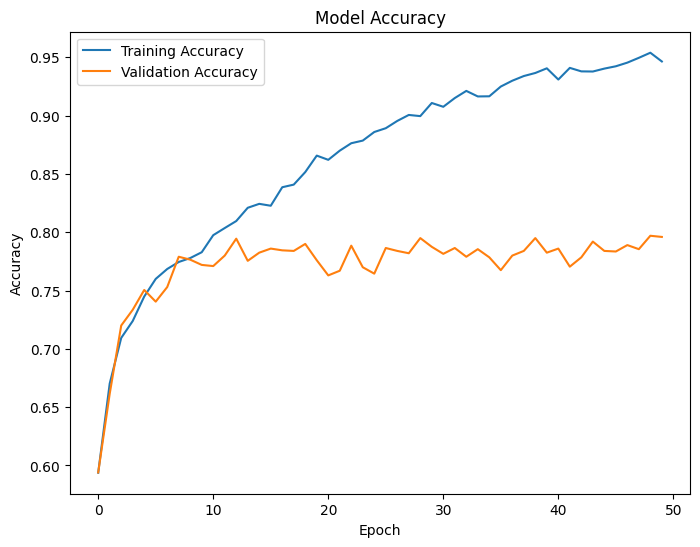

In [7]:
if 'history' in locals():
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

In [8]:
test_image_dir = '/kaggle/input/cat-vs-dog-image-classification-making-prediction/dataset/test_set'
categories = os.listdir(test_image_dir)
selected_category = random.choice(categories)
selected_image = random.choice(os.listdir(os.path.join(test_image_dir, selected_category)))
selected_image_path = os.path.join(test_image_dir, selected_category, selected_image)

In [9]:
test_image = image.load_img(selected_image_path, target_size=(64, 64))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array /= 255.0

In [10]:
result = cnn.predict(test_image_array)
confidence = result[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


In [11]:
if confidence > 0.5:
    prediction = 'dog'
    confidence_percentage = confidence * 100
else:
    prediction = 'cat'
    confidence_percentage = (1 - confidence) * 100

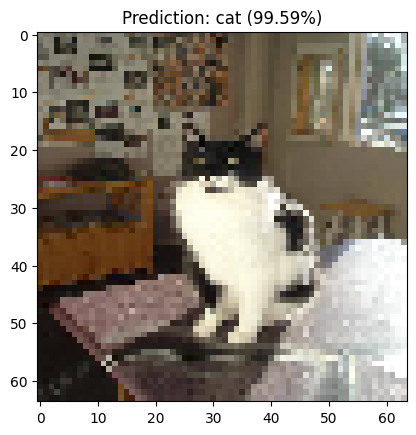

In [12]:
plt.imshow(test_image)
plt.title(f'Prediction: {prediction} ({confidence_percentage:.2f}%)')
plt.axis('on')
plt.show()